In [1]:
from act_pol.analysis.files import process_sim
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from act_pol.bdsim.bd import *
from scipy.stats import mode
from act_pol.bdsim import forces

In [ ]:
import numpy as np

In [ ]:
for i in np.arange(0,20+2.5,2.5):
    for j in np.arange(0, 200, 10):
        print(f"python flow_sim.py ${{SLURM_ARRAY_JOB_ID}}_${{SLURM_ARRAY_TASK_ID}} {i} 7 1/7 {j}")

In [62]:
B = 1
delta = np.array([0,0,0])-np.array([0,0,0])  # Displacement vector pointing from s2 to s1
d = np.linalg.norm(delta)  # Magnitude of displacement
R = 1
l = 1
# Velocity in the axis of flow


In [17]:
from fractions import Fraction
fraction_str = '1/9'
fraction_float = float(Fraction("0.123123"))
fraction_float

0.123123

In [3]:
def recommended_dt(*,N, L, b, D):
    r"""
    Recommended "dt" for use with ``rouse*jit`` family of functions.
    Our srk1 scheme is accurate as long as :math:`\Delta t` is less than the
    transition time where the MSD goes from high k behavior (:math:`t^1`) to
    Rouse behavior (:math:`t^{1/2}`).  This is exactly the time required to
    diffuse a Kuhn length, so we just need to ensure that :math:`\Delta t <
    \frac{\hat{b}^2}{6\hat{D}}` in 3D. The "crossover" from fast-k to
    rouse-like behavior takes about one order of magnitude in time, and it was
    determined empirically that decreasing the time step beyond that point
    doesn't seem to make the MSD any more accurate.
    Note that it can be shown that *no* scheme can accurately reproduce the
    bead behavior using larger time s teps than the time required to diffuse a
    distance of one Kuhn length.
    Notes
    -----
    Recall (doi & edwards, eq 4.25) that the first mode's relaxation time is
    :math:`\tau_1 = \frac{\xi N^2}{k \pi^2 }` (see Doi & Edwards, Eq. 4.25),
    and the :math:`p`\th mode is :math:`\tau_p = \tau_1/p^2` (this is the
    exponential falloff rate of the :math:`p`\th mode's correlation function).
    The accuracy of these values was also used when empirically determining the
    recommended ``dt``.
    """
    Nhat = L/b
    L0 = L/(N-1)
    Dhat = D*N/Nhat
    bhat = np.sqrt(L0*b)
    return (1/10)*bhat**2/(6*Dhat)

def terminal_relaxation(*,N, L, b, D):
    """ Rouse time for the polymer."""
    Nhat = L/b
    return b**2 * Nhat**2 / (3 * np.pi**2 * D)

In [5]:
i = 1  # Number of repeats
kb = 80.10471204188482 # nm per kb
Lc = 200*kb # 200 kb in nm
Lk = 35.36  # Kuhn length in nm
N = round(Lc/Lk)  # Number of beads
L = round(Lc/Lk)  # Chain length
b = 1  # Kuhn length, sets the length scale to be ~ Lk value
D = np.ones(N)  # Diffusion coefficients, sets the time scale to be ~ Lk^2 value
h = recommended_dt(N=N,L=L,b=b,D=mode(D)[0])  # Maximum dt
xi = np.ones(N)  # Friction coefficients
tmax = 2 * terminal_relaxation(N=N,L=L,b=b,D=mode(D)[0])  # Twice the Rouse time for the polymer
R = 250/Lk  # Radius of condensate in units of Kuhn length
l = 4242.640687119285/Lk  # Diffusion legnth of RNA in units of Kuhn length
B = 0  # Strength of condensate-to-promoter force
Lep = round(150*kb/Lk)  # Enhancer-promoter separation
mid = (N-1)/2  # Index to make enhancer and promoter symmetric about the polymer midpoint
s1 = round(mid - Lep/2)  # Enhancer position
s2 = round(mid + Lep/2)  # Promoter position
t_save = np.linspace(tmax/2,tmax,12)[1:-1]  # Save 10 points between Rouse times
t_msd = None  # Time to save MSD
msd_start_time = 0.0  # Time to start saving MSD
Deq = 1
lamb = 0

filedir = Path(f"./simulations/B{B:.1f}")  # Simulation directory
file = filedir/f'tape{i}.csv'  # File
try:
    file.parent.mkdir(parents=True)  # Make the simulation directory
except:
    if file.parent.is_dir() is False:
        # if the parent directory does not exist and mkdir still failed, re-raise an exception
        raise
print(f'Running simulation {filedir.name}')
X, _ = flow_with_srk1(N, L, b, D, h, xi, tmax, R, l, B, s1, s2, lamb, t_save, t_msd, msd_start_time,
                      Deq)
dfs = []
for i in range(X.shape[0]):
    df = pd.DataFrame(X[i, :, :])
    df['t'] = t_save[i]
    df['D'] = D #save diffusivities of beads
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True, sort=False)
df.set_index(['t'], inplace=True)
df.to_csv(file)

Running simulation B0.0


KeyboardInterrupt: 

In [9]:
250/Lk

7.070135746606335

In [28]:
t_save = np.linspace(tmax/2,tmax,12)[1:-1]
t_save.shape

(10, 453)

In [2]:
simdir = "/home/gridsan/ddavid/active-polymers/simulation/run0.0/tape1.csv"
X, t = process_sim(simdir)

In [6]:
X.shape

(5001, 101, 3)

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.900e+01,
         1.449e+03, 2.187e+03, 1.121e+03, 2.150e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         2.000e+01, 1.352e+03, 2.968e+03, 6.610e+02],
        [8.740e+02, 1.414e+03, 2.048e+03, 6.060e+02, 5.800e+01, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([-623.40106499, -526.54697263, -429.69288027, -332.83878791,
        -235.98469555, -139.13060319,  -42.27651083,   54.57758152,
         151.43167388,  248.28576624,  345.1398586 ]),
 <a list of 3 BarContainer objects>)

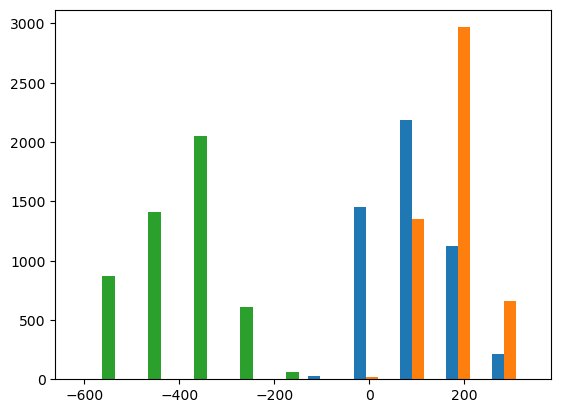

In [7]:
plt.hist((X[:,0,:] - X[:,-1,:]))

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.900e+01, 3.560e+02,
        1.061e+03, 1.035e+03, 1.569e+03, 9.200e+02]),
 array([  0.        ,  63.59050903, 127.18101805, 190.77152708,
        254.3620361 , 317.95254513, 381.54305415, 445.13356318,
        508.7240722 , 572.31458123, 635.90509025]),
 <BarContainer object of 10 artists>)

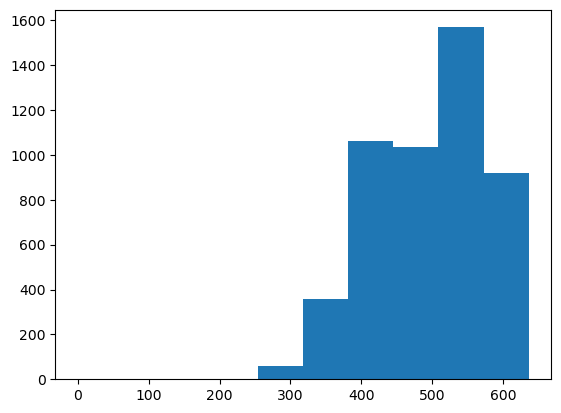

In [3]:
plt.hist(np.sqrt(np.sum((X[:,0,:] - X[:,-1,:])**2,axis=1)))

In [9]:
simdir = "/home/gridsan/ddavid/active-polymers/simulation/run100.0/tape1.csv"
X, t = process_sim(simdir)

(array([101., 169., 197., 176., 115.,  68.,  83.,  41.,  46.,   5.]),
 array([134.5730564 , 149.02647477, 163.47989314, 177.93331151,
        192.38672987, 206.84014824, 221.29356661, 235.74698498,
        250.20040335, 264.65382172, 279.10724009]),
 <BarContainer object of 10 artists>)

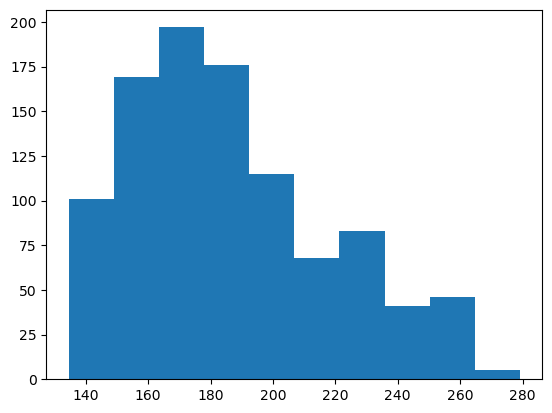

In [10]:
plt.hist(np.sqrt(np.sum((X[:,0,:] - X[:,-1,:])**2,axis=1)))

In [64]:
def force_components(p1, p2, R, l, B):
    """Compute force components acting on p1 towards p2"""
    delta = p1 - p2  # Displacement vector of p1 from p2
    d = np.linalg.norm(delta)  # Magnitude of displacement vector
    f_magnitude = - B * flow(d, R, l)  # Attractive force is - B (beta) * dimless velocity
    return f_magnitude * delta / d  # Array of x, y, and z components
def flow(d,R,l):
    """Dimensionless velocity of condensate flow"""
    return 1/d**2*(np.exp(-(R+d)/l)*(l+R)*(l+d)-np.exp(-np.abs(R-d)/l)*(l**2-R*d+l*np.abs(R-d)))

In [65]:
force_components(np.array([1,1,1]),np.array([0,0,0]),1,1,1)

array([-0.06844194, -0.06844194, -0.06844194])